In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import glob
%matplotlib inline
np.random.seed(42)
plt.style.use('bmh')

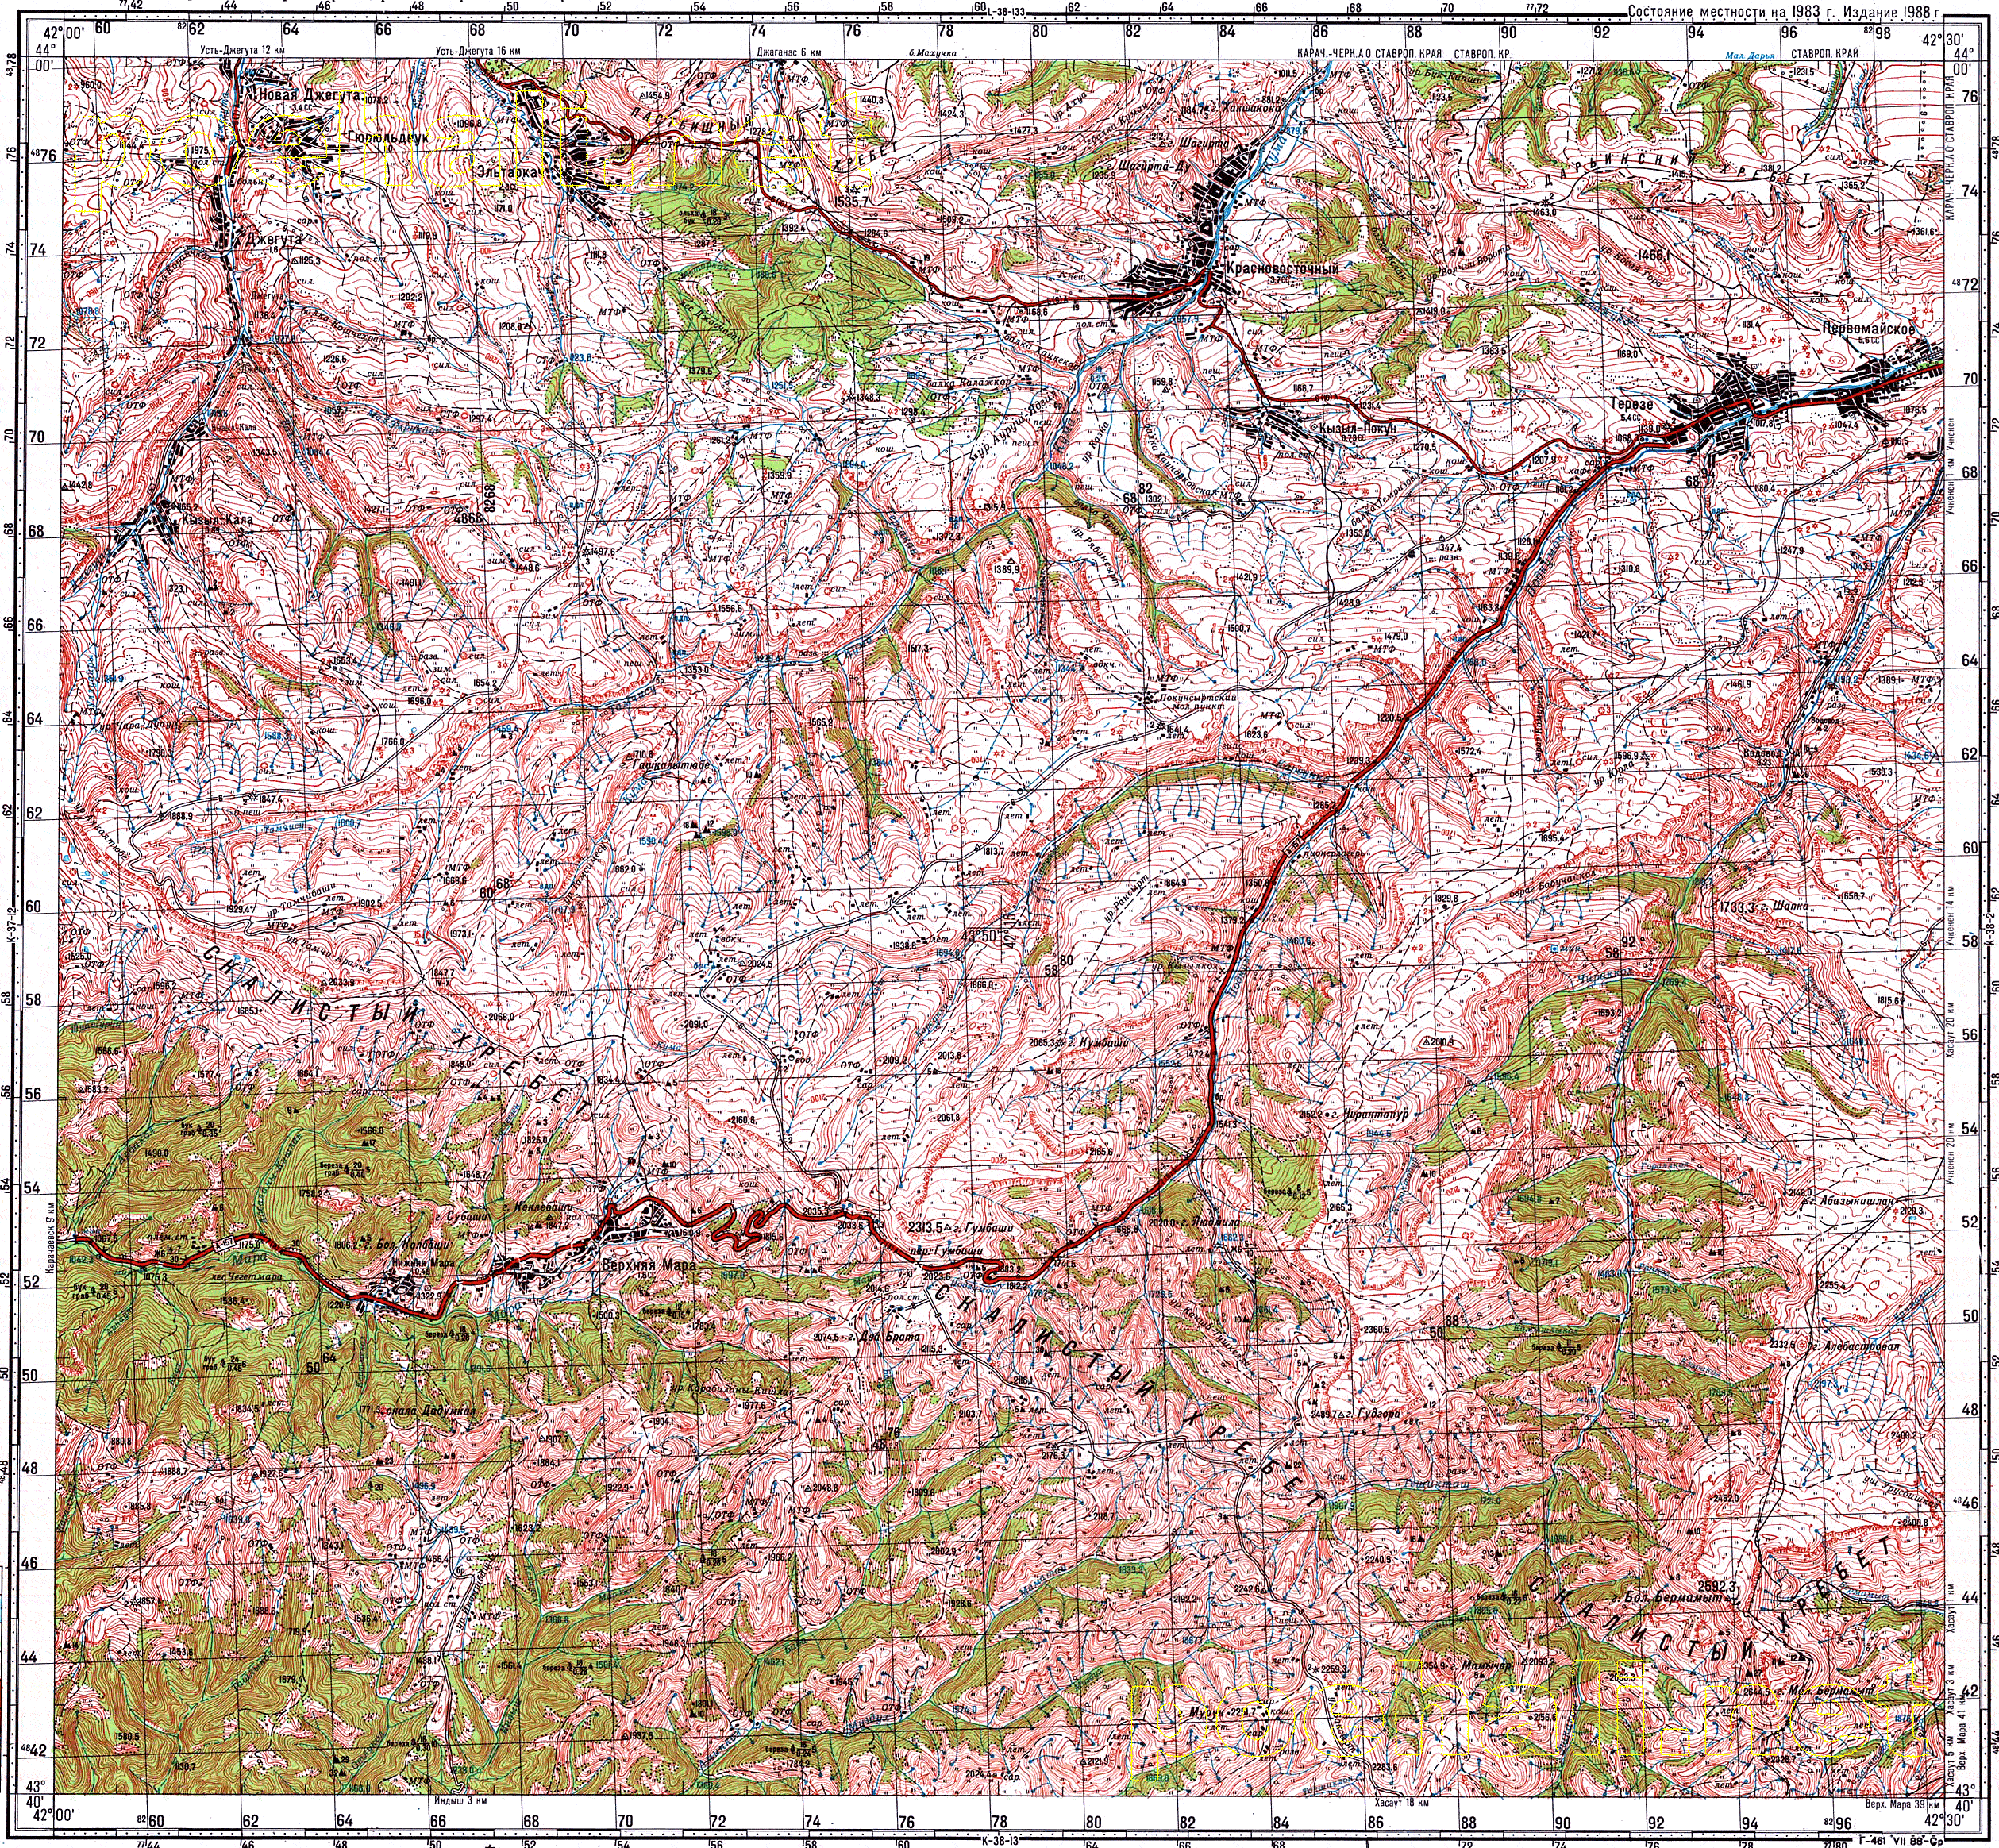

In [2]:
sample_img = Image.open('k38_lom_imgs/100k--k38-001.gif')
sample_img

In [97]:
img_fps = glob.glob('./k38_lom_imgs/*.gif')
sample_img_fps = np.random.choice(img_fps, 5)
sample_imgs = [ndimage.imread(img_fp) for img_fp in sample_img_fps]

(-0.5, 2521.5, 2321.5, -0.5)

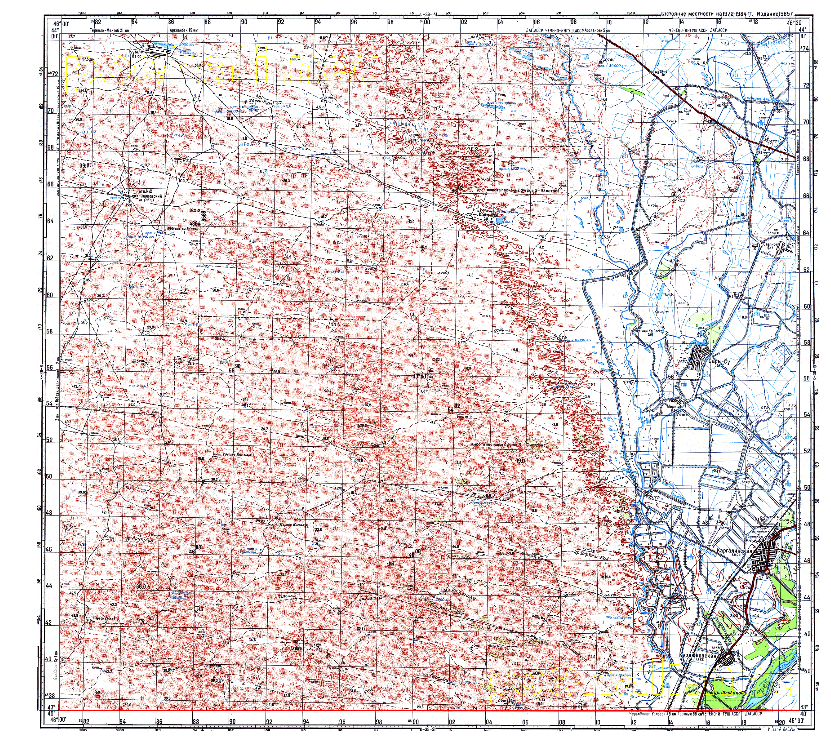

In [236]:
# Plotting a bounding box on top of an image
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(14, 14))
ax.imshow(sample_imgs[0])
rect = patches.Rectangle((70, 70),2390,2185,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.axis('off');

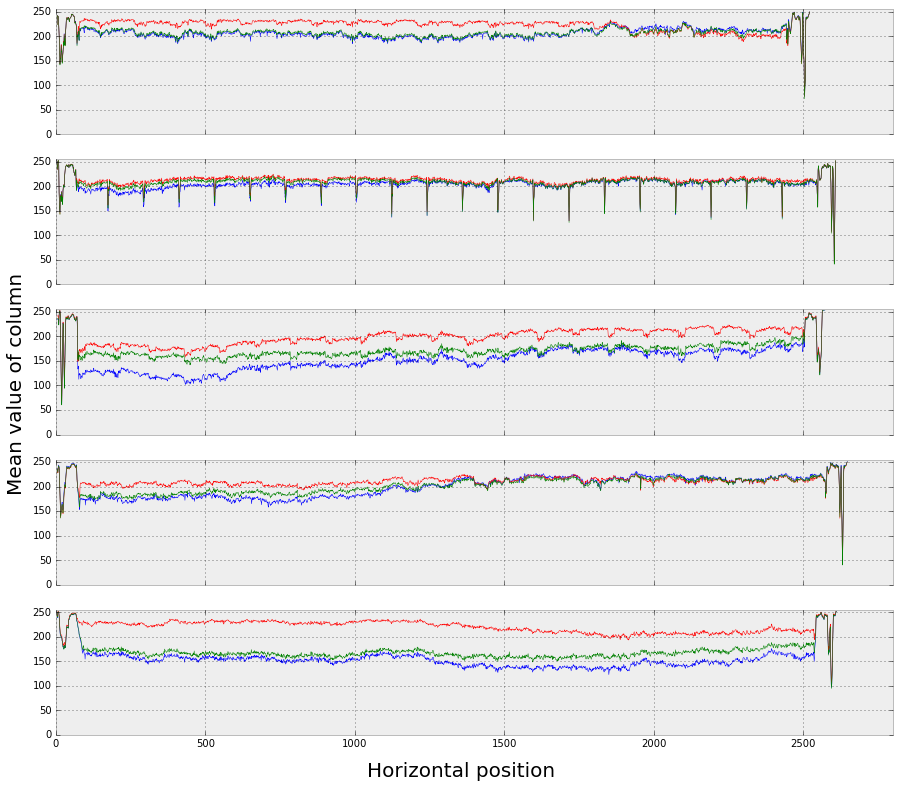

In [98]:
f, axs = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(15, 13))
for j, img in enumerate(sample_imgs):
    r, g, b = cv2.split(img)
    axs[j].plot(np.mean(b, axis=0), 'b', lw=0.5)
    axs[j].plot(np.mean(r, axis=0), 'r', lw=0.5)
    axs[j].plot(np.mean(g, axis=0), 'g' ,lw=0.5)
    axs[j].set_ylim(0, 255)
    axs[j].set_xlim(0, 2800)
f.text(0.5, 0.08, 'Horizontal position', ha='center', fontsize=20)
f.text(0.08, 0.5, 'Mean value of column', va='center', rotation='vertical', fontsize=20);

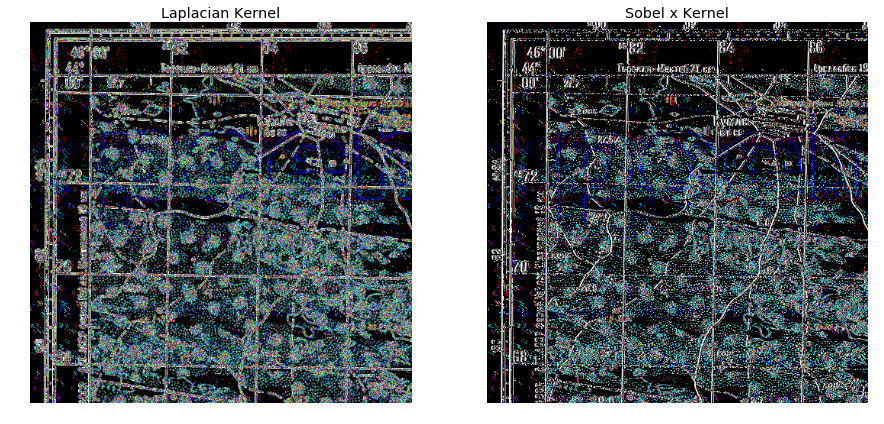

In [183]:
# Detecting the map's corners
f, axs = plt.subplots(1, 2, figsize=(15, 7))
img_x_grad_sobel = cv2.Sobel(sample_imgs[0], ddepth=cv2.CV_32F, dx=1, dy=0, ksize=1)
img_grad_lapl = cv2.Laplacian(sample_imgs[0], cv2.CV_32F, ksize=1)
axs[0].imshow(img_grad_lapl[:500, :500]); axs[0].set_title('Laplacian Kernel')
axs[1].imshow(img_x_grad_sobel[:500, :500]); axs[1].set_title('Sobel x Kernel')
axs[0].axis('off'); axs[1].axis('off');

In [184]:
img_gscale_sobel = cv2.cvtColor(img_x_grad_sobel, cv2.COLOR_RGB2GRAY)

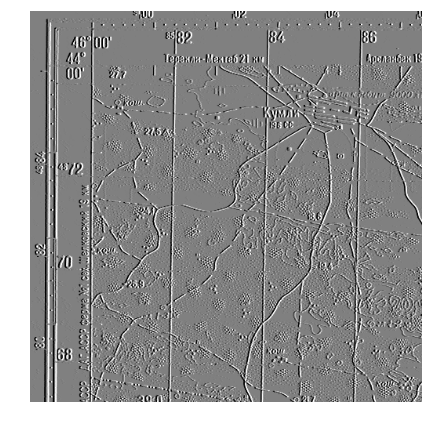

In [185]:
plt.figure(figsize=(7, 7))
plt.imshow(img_gscale_sobel[:500, :500], cmap='gray')
plt.axis('off');

In [204]:
THRESHOLD = 60
img_bw_sobel = img_gscale_sobel.copy()
img_bw_sobel[img_bw_sobel >= THRESHOLD] = 255
img_bw_sobel[img_bw_sobel < THRESHOLD] = 0

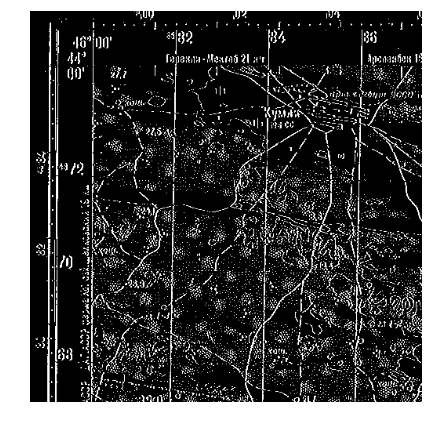

In [205]:
plt.figure(figsize=(7, 7))
plt.imshow(img_bw_sobel[:500, :500], cmap='gray')
plt.axis('off');

In [141]:
low_pass_kernel = np.ones([3, 3])

In [142]:
img_sobel_lp = cv2.filter2D(img_x_grad_sobel, -1, low_pass_kernel)